# Bufferfly Chart
Also called: Tornado Chart, Tornado Diagram

![alt text](https://datavizproject.com/wp-content/uploads/2016/06/DVP_101_200-21.png)

A Butterfly Chart (also called Tornado Chart) is a type of bar chart where two sets of data series are displayed side by side. It gives a quick glance of the difference between two groups with same parameters. It is also possible to stack/place two bars on each side (for example, ‘developed countries’ and ‘developing countries’) to give a further division of categories.

The main use of the butterfly chart is comparison of two data sets sharing the same parameters.
It has a lot of similarity with the population pyramid, but where the population pyramid is only for population data, the butterfly chart has a broader use as a comparison chart.

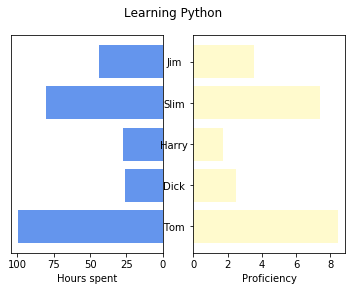

In [2]:
# tornado chart example
import numpy as np
import matplotlib.pyplot as plt


people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
num_people = len(people)

time_spent = np.random.uniform(low=5, high=100, size=num_people)
proficiency = np.abs(time_spent / 12. + np.random.normal(size=num_people))
pos = np.arange(num_people) + .5    # bars centered on the y axis

fig, (ax_left, ax_right) = plt.subplots(ncols=2)
ax_left.barh(pos, time_spent, align='center', facecolor='cornflowerblue')
ax_left.set_yticks([])
ax_left.set_xlabel('Hours spent')
ax_left.invert_xaxis()

ax_right.barh(pos, proficiency, align='center', facecolor='lemonchiffon')
ax_right.set_yticks(pos)
# x moves tick labels relative to left edge of axes in axes units
ax_right.set_yticklabels(people, ha='center', x=-0.08)
ax_right.set_xlabel('Proficiency')

plt.suptitle('Learning Python')

plt.show()

(-1, 8)

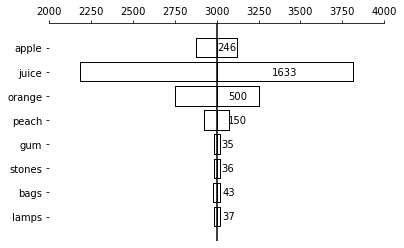

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

###############################################################################
# The data (change all of this to your actual data, this is just a mockup)
variables = [
    'apple',
    'juice',
    'orange',
    'peach',
    'gum',
    'stones',
    'bags',
    'lamps',
]

base = 3000

lows = np.array([
    base - 246 / 2,
    base - 1633 / 2,
    base - 500 / 2,
    base - 150 / 2,
    base - 35 / 2,
    base - 36 / 2,
    base - 43 / 2,
    base - 37 / 2,
])

values = np.array([
    246,
    1633,
    500,
    150,
    35,
    36,
    43,
    37,
])

###############################################################################
# The actual drawing part

# The y position for each variable
ys = range(len(values))[::-1]  # top to bottom

# Plot the bars, one by one
for y, low, value in zip(ys, lows, values):
    # The width of the 'low' and 'high' pieces
    low_width = base - low
    high_width = low + value - base

    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        [(low, low_width), (base, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'white'],  # Try different colors if you like
        edgecolors=['black', 'black'],
        linewidth=1,
    )

    # Display the value as text. It should be positioned in the center of
    # the 'high' bar, except if there isn't any room there, then it should be
    # next to bar instead.
    x = base + high_width / 2
    if x <= base + 50:
        x = base + high_width + 50
    plt.text(x, y, str(value), va='center', ha='center')

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 1000, base + 1000)
plt.ylim(-1, len(variables))